In [1]:
%%capture
# DO NOT EDIT THIS NOTEBOOK
# It generates a report to verify your submission
import logging, sys, os
logging.disable(sys.maxsize)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import solution
import time
start_verify = time.time()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

In [2]:
%matplotlib inline
import os
import pickle
import pandas as pd
import numpy as np
import pydot
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import inspect
from IPython.core import page
page.page = print

grades = []

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')
        
def printSource(obj):
    print(''.join(str(x) for x in inspect.getsourcelines(obj)[0]))
        
# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

def print_answer(ans):
    output = ""
    for line in ans.splitlines()[1:]:
        output += line.strip() + " "
    output += "(length: "+str(len(output))+")\n"
    print(output)
        
def run_evaluation(name, model_builder, data, base_dir, target_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, print_model=True, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        grades.append("0")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Model not trained? Skipping.", verbose)
    else: # Load from file
        model = solution.load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
    # Report
    lc = pd.DataFrame(learning_curves)
    print("Max val score: {:.2f}%".format(lc.iloc[:,3].max()*100))
    grades.append("{:.2f}".format(lc.iloc[:,3].max()*100))
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    plt.show()
    
    if print_model:
        print(model.summary())
    plot_model(model, to_file=os.path.join(target_dir,name+'.png'), show_shapes=True, show_layer_names=False)
        
import pprint
pp = pprint.PrettyPrinter(indent=4)

### Web Information Retrieval and Data Mining - Assignment 3

In [3]:
grades.append(solution.target_dir.split(os.sep)[-1])
grades.append(solution.your_name)
print("Student: {0} ({1})".format(solution.your_name,solution.student_id))

Student: Zahariev, Tsvetan (1035269)


#### Answer 1.1, Baseline (4p)
- Dense network, at least 3 layers, shaped like a pyramid
    - Last layer: 10 nodes, sigmoid. 
    - Loss: categorical cross-entropy. Metric: accuracy
- No preprocessing, regularization. Get at least 70% accuracy.
- Explain design decisions. Discuss performance.
    - Does it overfit (large/growing gap between loss and val_loss)?

Only 3 hidden Dense layers plus one Flatten. Flatten layer is to just transform the input to handle different dimensional inputs. First layer has 3072 Nodes as 32*32*3 = 3072. Then start to halve the following layers. Last layer in an output with 10 nodes as we have 10 classes. SGD was the best performing optimizer, as it is fast, causes the loss func to fluctuate discovering new and possibly better minima. (Note: Specifying the input shape in the first hidden layer crashed on the following question, so I used Flatten to make it more general)  (length: 550)



Max val score: 77.62%


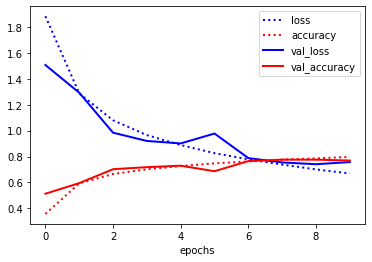

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  9440256   
_________________________________________________________________
dense_1 (Dense)              multiple                  4720128   
_________________________________________________________________
dense_2 (Dense)              multiple                  1205008   
_________________________________________________________________
dense_3 (Dense)              multiple                  7850      
Total params: 15,373,242
Trainable params: 15,373,242
Non-trainable params: 0
_________________________________________________________________
None


def build_model_1_1():
    model_1_1 = models.Sequential()
    #model_1_1.add(layers.Reshape((3072,), input_shape=(32*32,)))
    model_1_1.add(layers.Flatten())
    model_1_1.add(layers.Dense(3072, activation='relu'))
    model_1_1.add(layers.Dense(1536, activation='relu'))
    model_1_1.add(layers.Dense(784, activation='relu'))
    model_1_1.add(layers.Dense(10, activation='softmax'))
    model_1_1.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model_1_1



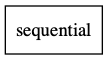

In [4]:
print_answer(solution.answer_q_1_1)
run_evaluation("model_1_1", solution.build_model_1_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_1
if os.path.exists(os.path.join(solution.target_dir,'model_1_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_1_1.png'), width=200))

#### Answer 1.2, Preprocess (2p)
- Convert images to greyscale, other preprocessing optional.
    - Input shape should be (32,32,1)
- Explain design decisions. Is it better? Why (not)? 
    - Color information is likely not so useful for classification. Greyscale makes the network smaller, less parameters to learn, less likely to overfit.

Structure of the mode is exactly the same as the previous. Here the data is converted from RGB to gray scale thus also reducing its shape to 32*32*1. Causing the first layer to have 3 times as many nodes relative to input. Gray scaling reduced slightly the resilts but the learning is smoother. Less over/under fitting. Model generalizes well as the loss and accuracy for both train/test sets are close.  (length: 405)

Max val score: 78.97%


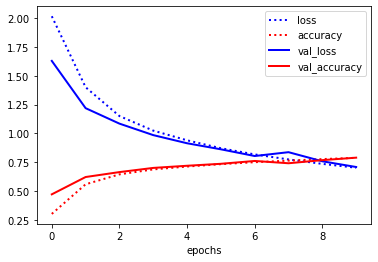

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_4 (Dense)              multiple                  3148800   
_________________________________________________________________
dense_5 (Dense)              multiple                  4720128   
_________________________________________________________________
dense_6 (Dense)              multiple                  1205008   
_________________________________________________________________
dense_7 (Dense)              multiple                  7850      
Total params: 9,081,786
Trainable params: 9,081,786
Non-trainable params: 0
_________________________________________________________________
None
def build_model_1_2():
    model_1_2 = models.Sequential()
    model_1_2.add(layers.Flatten())
    model_

In [5]:
print_answer(solution.answer_q_1_2)
run_evaluation("model_1_2", solution.build_model_1_2, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_2

#### Answer 1.3, Tune (4p)
- Regularize the model. What works best? 
    - Should consider batch normalization, dropout, l1/l2 regularization (or Nesterov)
- Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
    - At least consider tuning learning rate, ideally also momentum, decay, other optimizers 
- Explain your findings and final design decisions. Discuss the results.
    - Should be better, at least it shouldn't overfit

Again same structure. Now each layer has a level 2 regularizer. Only on the first and output layer the regularizer take effect as the others are set to 0. Generally the model in the rpevious section barely overfits, hence using regularization negatively affect this model. SO that's why the values are small and present only on two layers. The larger values I tried the worse the model performed. Hence regularizers are not really necessary here.  (length: 448)



Max val score: 77.52%


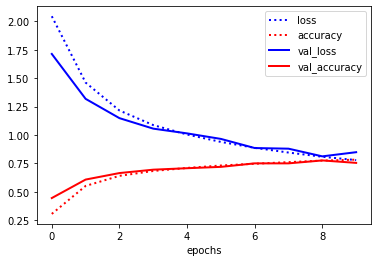

def build_model_1_3():
    model_1_3 = models.Sequential()
    model_1_3.add(layers.Flatten())
    model_1_3.add(layers.Dense(3072, kernel_regularizer=regularizers.l2(0.00001),
                               activation='relu'))
    model_1_3.add(layers.Dense(1536, kernel_regularizer=regularizers.l2(0.00),
                               activation='relu'))
    model_1_3.add(layers.Dense(784, kernel_regularizer=regularizers.l2(0.00),
                               activation='relu'))
    model_1_3.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.001),
                               activation='softmax'))
    model_1_3.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model_1_3



In [6]:
print_answer(solution.answer_q_1_3)
run_evaluation("model_1_3", solution.build_model_1_3, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
%psource solution.build_model_1_3

#### Answer 2.1, ConvNet (7p)
- Build a sequential ConvNet, get at least 90% accuracy.
    - Conv2D layers, input shape (32,32,1)
    - Consider using blocks of Conv2D layers with maxpooling in between
    - Use zero-padding in Conv2D layers because the images are small
    - At least one dense hidden layer and dense output layer (sigmoid)
    - Consider adding batch normalization, dropout
    - Consider small dropout rates in beginning, larger dropout rates later in network
    - Consider other optimizers and tuning learning rate, momentum,...
- Explain what you did and why (800 chars). Is it working well?
    - Should be quite elaborate and sensible

The CNN follows the same structure as the one presented in the labs. Here the input shape is different 32*32*1 as we are dealing with grayscale images. In total we have 6 convolutional layers. After each conv layer we do a batch normalization to speed up learning and also reduce the covariance shift. Additionally with batch normalizaiton we reduce overfitting thus achieving slight regularization. In order to improve regularization we have 4 droput layers to get rid of unnecassary nodes which might stop us from learning well. We have 3 Max- Pooling layers which help with reducing overfitting and reduce the need of deeper networks. The model performs well, actually one can reduce the training epochs as the model starts to overfit after epoch 10.  (length: 755)



Max val score: 95.35%


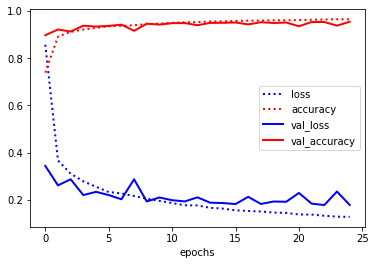

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)       

def build_model_2_1():
    model_2_1 = models.Sequential()
    model_2_1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                                input_shape=(32, 32, 1)))
    model_2_1.add(layers.BatchNormalization())
    model_2_1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model_2_1.add(layers.BatchNormalization())
    model_2_1.add(layers.MaxPooling2D((2, 2)))
    model_2_1.add(layers.Dropout(0.2))
    model_2_1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model_2_1.add(layers.BatchNormalization())
    model_2_1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model_2_1.add(layers.BatchNormalization())
    model_2_1.add(layers.MaxPooling2D((2, 2)))
    model_2_1.add(layers.Dropout(0.3))
    model_2_1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model_2_1.add(layers.BatchNormalization())
    model_2_1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='sam

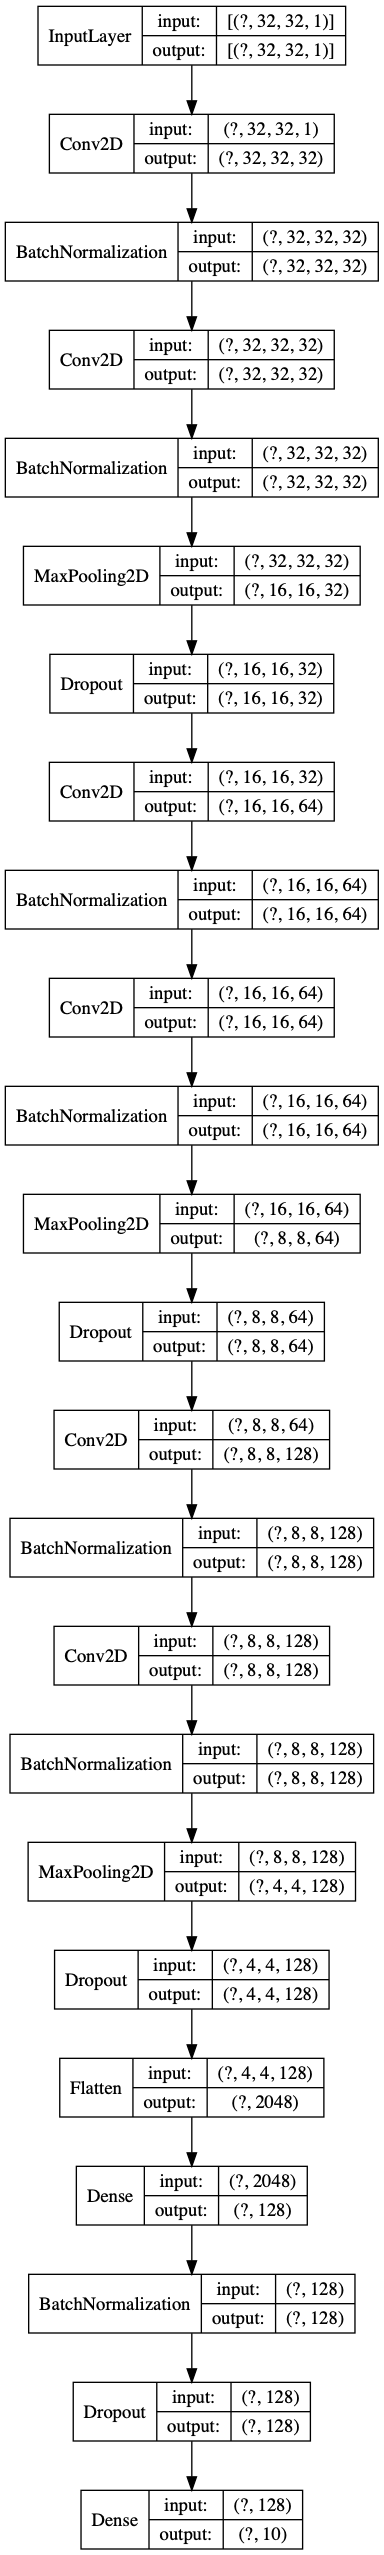

In [7]:
print_answer(solution.answer_q_2_1)
run_evaluation("model_2_1", solution.build_model_2_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_2_1
if os.path.exists(os.path.join(solution.target_dir,'model_2_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_2_1.png'), width=200))

#### Answer 2.2, Data Augmentation (3p)
- Augment the preprocessed training data.
    - Use small variations (small shifts up-down, left-right) of flips becasue the images are small
    - Large shifts and rotations distort the image too much
- Explain what you did and why. Discuss the performance of the model.

Most image changes are allowed. In general this is not really need given the size of our dataset. However with the newly generated images we have introduced noisy images because of the fill reducing performance on training data, but still keeping good performance on testing data. When using batch_size=64, we also have too large batches and loose data. Hence the batch size was reduced to 32 which gave decent resutls.  (length: 421)



Max val score: 92.75%


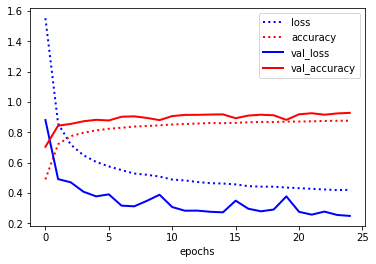


train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


In [8]:
print_answer(solution.answer_q_2_2)
run_evaluation("model_2_2", solution.build_model_2_1, solution.augmented_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
print(solution.dg_code)

#### Answer 3.1, Misclassifications (2p)
- Report the test score (on the held-out test data)
    - Should be similar to score of previous model
- Plot confusion matrix, discuss which classes are often confused.
    - class 1 and 2 are most often confused
- Visualize the misclassifications in more depth by focusing on a single class
- Analyse which kinds of mistakes are made for that class.
    - Should contain some insight (e.g. misclassifications when the numbers are curly or noisy)

From the matrix one can see that the most misclassified digits are 6 and 0. We have decided to examine the class of the digit 3. When computing the accuracy on the testing dat we can see that it is quite similar to the one obtained in the previous question. From the images one can see that the NN confuses the 3 a lot with 8,5,2,9 and some others. However most of the images are of very blurry. Additionally some images do indeed look similar. Some 3 are fancy and look like 8 as there is barely any space between the lines. When confusing 3 for 9 the 3 has an almost circle like top and open bottom part. For 2,5 a simlar reason applies. Sometimes it recognizes the wrong digit, not the one in focus.  (length: 704)

Test score: 0.92%


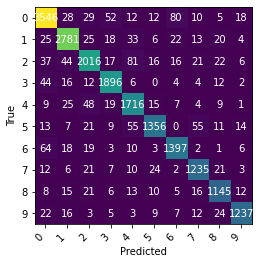

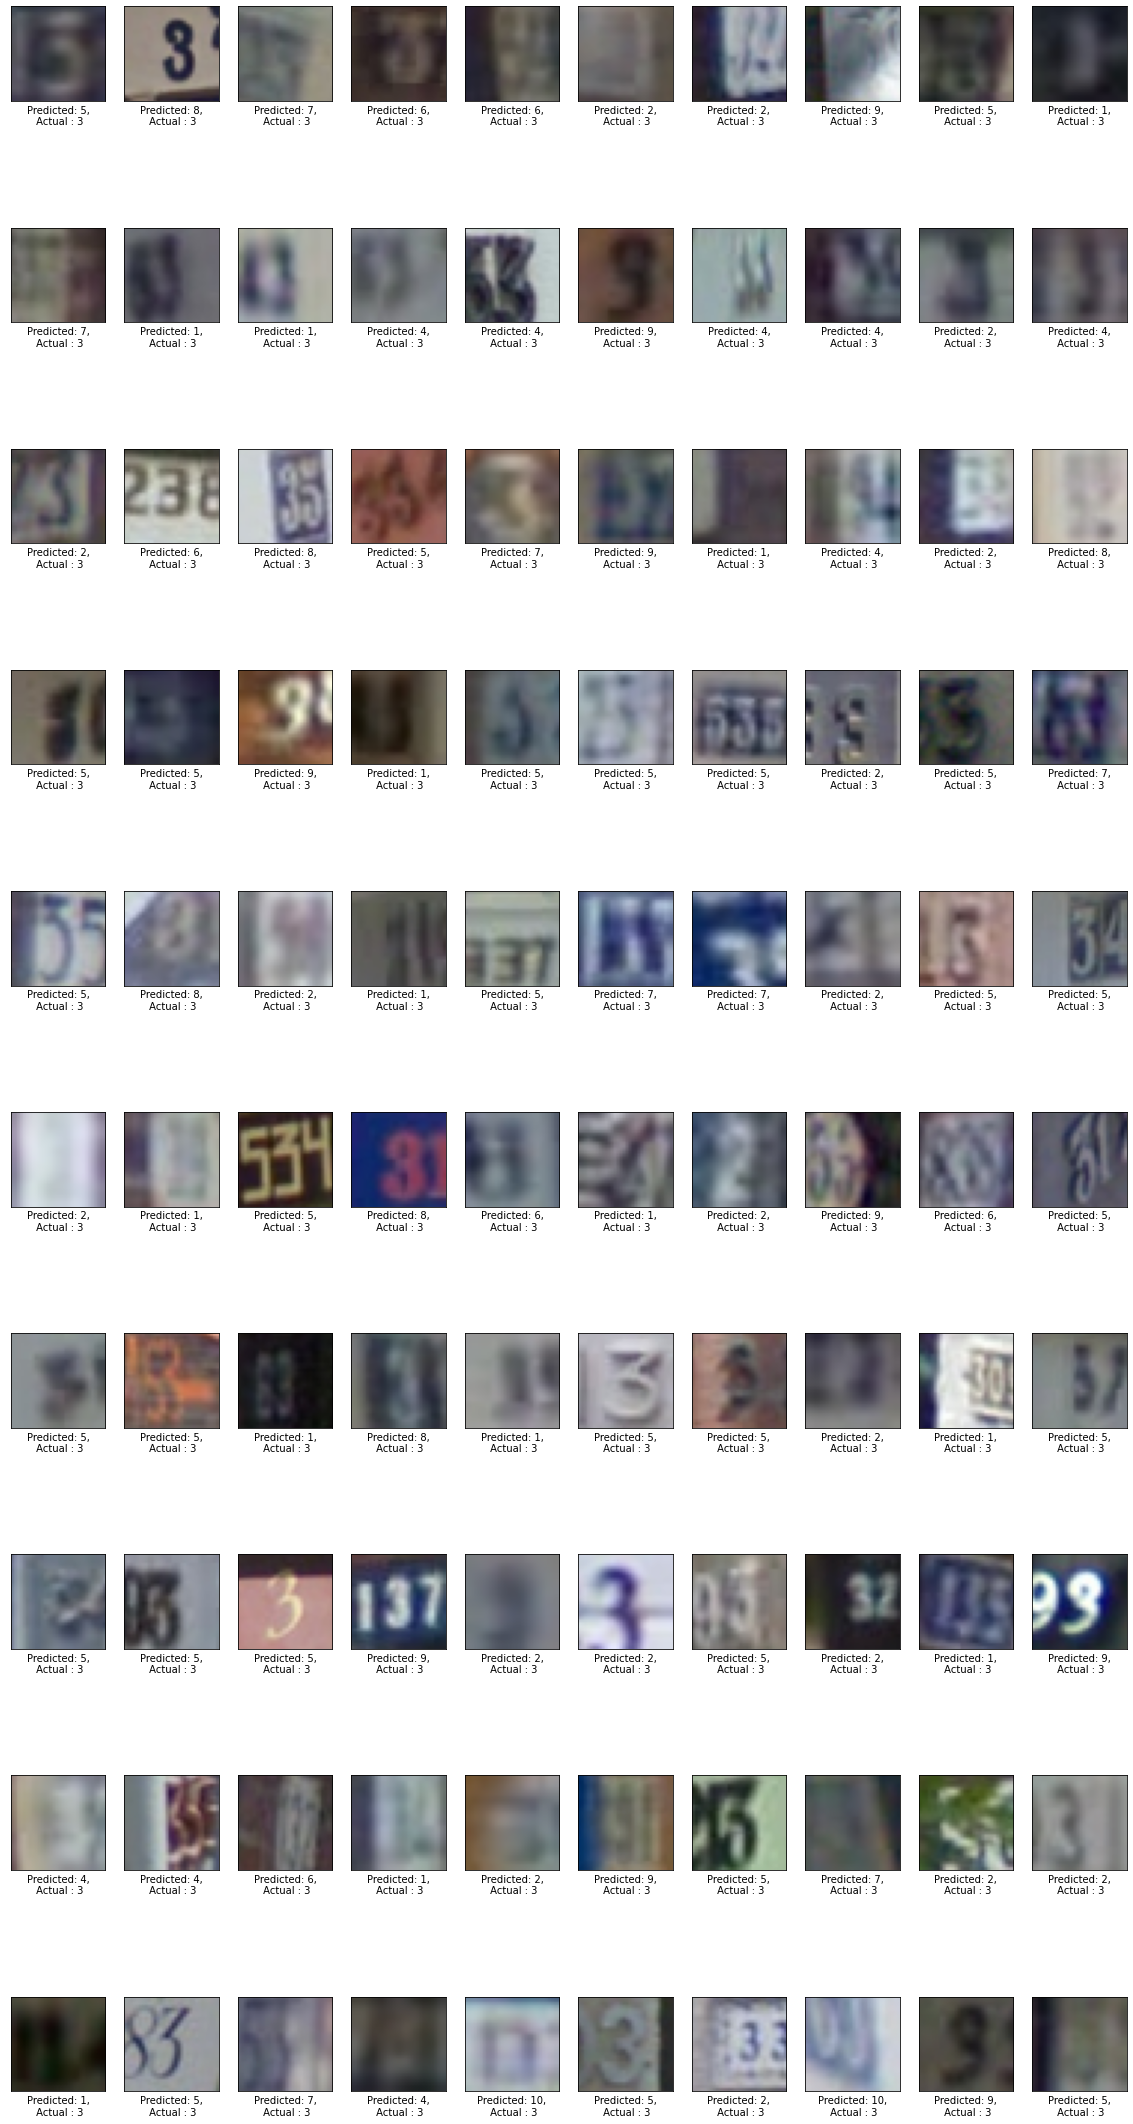

In [9]:
print_answer(solution.answer_q_3_1)
if hasattr(solution, 'test_accuracy_3_1'):
    try:
        print("Test score: {:.2f}%".format(solution.test_accuracy_3_1))
    except TypeError:
        print("Test score:",solution.test_accuracy_3_1)
else:
    print("Test score NOT FOUND: test_accuracy_3_1 missing")
try:
    solution.plot_confusion_matrix()
except:
    print("ERROR, could not build confusion matrix. Please check original report")
try:
    solution.plot_misclassifications()
except:
    print("ERROR, could not build misclassification plot. Please check original report")

#### Answer 3.2, Activations (4p)
- Retrieve and visualize the activations for one example
- For every filter for different convolutional layers (at different depths in the network).
- Give an explanation. Is your model indeed learning something useful?
    - Should detect edges etc in first layers, higher-order object (e.g. interesting regions) in deeper layers.

I have decided to focus only on the most interesting layers. In the first interesting layer we can see how the CNN focuses on diagonal lines, circles, lines, half-circles, edges, maybe at times on horizontal lines. The second interesting layer shows how the CNN focuses on the background and from here on now for the layers it becomes harder to see on what exactly the filter focuses on. The very first conv layer appears to have many blank filter which are of no use for this digit  (length: 484)



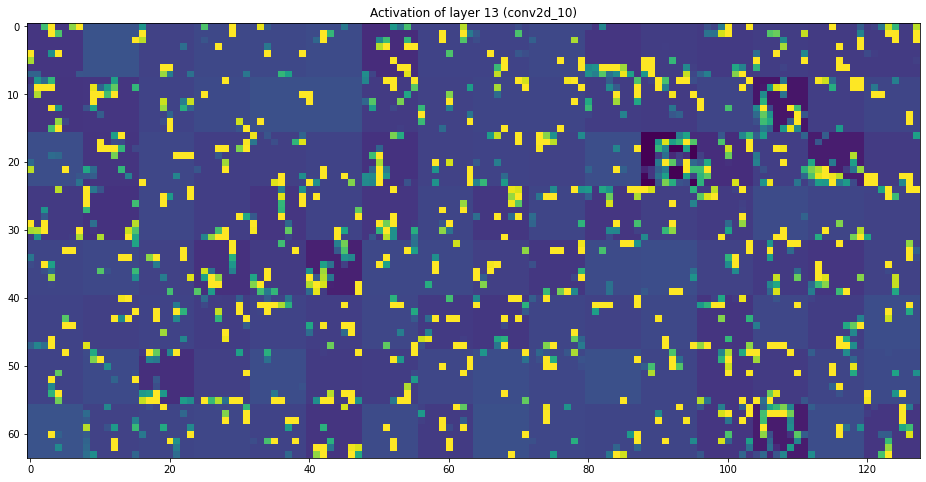

In [10]:
print_answer(solution.answer_q_3_2)
try:
    solution.plot_activations()
except:
    print("ERROR, could not build activation plot. Please check original report")

#### Answer 3.3, Class activation map (4p)
- Show a class activation map for your last convolutional layer
- Superimpose the activation map over the image, or plot side by side
    - Should make sense, detect interesting regions to classify the number

def plot_3_3():

    model_3_3 = load_model_from_file(base_dir, "model_2_2", extension='.h5')

    img_tensor = rgb2gray(X_test)[0]
    img_tensor = np.expand_dims(img_tensor, axis=0)

    img_tensor_color = X_test[0]
    img_tensor_color = np.expand_dims(img_tensor_color, axis=0)  

    layer_outputs = [layer.output for layer in model_3_3.layers[:15]]
    layer_names = [layer.name for layer in model_3_3.layers[:15]]

    activation_model = models.Model(inputs=model_3_3.input, outputs=layer_outputs)
    activations = activation_model.predict(img_tensor)

    plt.rcParams['figure.dpi'] = 120
    first_layer_activation = activations[0]

    for i in range(-1,0):
        f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
        ax1.imshow(img_tensor_color[0])
        ax2.matshow(first_layer_activation[0, :, :, i], cmap='viridis')
        ax1.set_xticks([])
        ax1.set_yticks([])
        ax2.set_xticks([])
        ax2.set_yticks([])
        ax1.set_xlabel('Input image')
        ax2.set_x

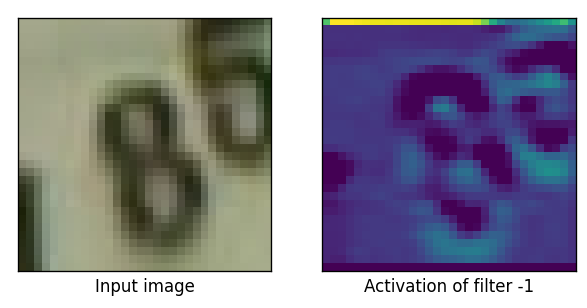

In [11]:
try:
    solution.plot_3_3()
except:
    print("ERROR, could not build class activation plot. Please check original report")
if hasattr(solution, 'plot_activation_map'):
    %psource solution.plot_activation_map
else:
    %psource solution.plot_3_3

#### Answer 4.1, Fast feature extraction (5p)
- Import the VGG16 model, pretrained on ImageNet
- Freeze convolutional base, adds a dense layer
- Consider unfreezing the last few convolutional layers and evaluate whether that works better
    - Check if they do. It is very likely to help.
- Discuss the observed performance
    - Should get around 80% accuracy

Comparing it to the model built in question 2, here we get worse performance. However the performance is not bad at all. It gets around 89% accuracy on the training and 75% on the valuation. However 25 epochs are bit too much because after roughly 10, the model starts to overfit quite a bit and 25 its overfitting a lot. Compared to having all layers frozen, unfreezing the last 3 improves accuracy with 20%.  (length: 411)



Max val score: 76.46%


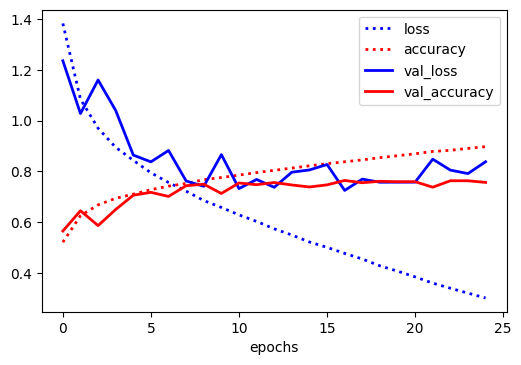

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 15,250,250
Trainable params: 5,255,178
Non-trainable params: 9,995,072
_________________________________________________________________
None


def build_model_4_1():
    freeze_all_layers = False
    n = 3 # Last n layers to unfreeze
    if freeze_all_layers:
        for layer in vgg.layers:
            layer.trainable = False
    else:
        for layer in vgg.layers[:-n]:
            layer.trainable = False
    model_4_1 = models.Sequential()
    model_4_1.add(vgg)
    model_4_1.add(layers.Flatten())
    model_4_1.add(layers.Dense(1024, activation='relu'))
    #model_4_1.add(layers.Dropout(0.5))
    model_4_1.add(layers.Dense(10, activation='softmax'))
    # If 'rms prop' - slightly better results, as numbers but starts to overfit
    # too much, That is the accuracy constantly increases whereas the 
    # val_accuracy barely changes. Decided to trade off better values for lack
    # of under-over fit
    model_4_1.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model_4_1



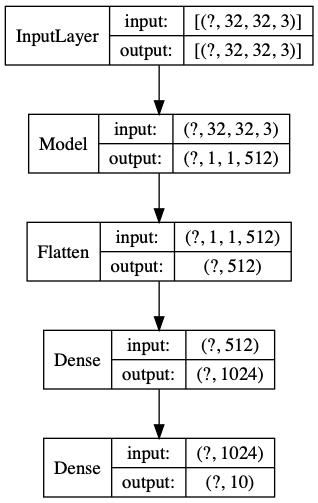

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

print_answer(solution.answer_q_4_1)
run_evaluation("model_4_1", solution.build_model_4_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_4_1
if os.path.exists(os.path.join(solution.target_dir,'model_4_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_4_1.png'), width=200))
#solution.build_model_4_1().layers[0].summary()

#### Answer 4.2, Embeddings (5p)
- Generate embeddings with the trained convolutional part of model_4_1 (without the dense layer)
- Embed the training and test data and store them to disk
- Build and evaluate a pipeline on the embedded data
    - Check if pipeline makes sense (e.g. use models that can handle many dimensions)
- Describe what you did and what you observed (max 800 chars).
    - Consider different models, preprocessing, tuning, etc.
    - Check performance (see original Submission.html) when in doubt. We did not run all the evaluations because it takes too long, and the output is ill-defined.

In [13]:
print_answer(solution.answer_q_4_2)
print(solution.generate_pipeline())
#print("Evaluation:",solution.evaluation_4_2(solution.X_train, solution.y_train, solution.X_test, solution.y_test))
%psource solution.store_embeddings
%psource solution.evaluation_4_2

The obtained accuracy is better than the previous taks, now it is at around 80%! The pipeline is very simple using a standard scaler and a svm classifier. The normalizer and power tranformer gave really bad resukts around 55-56% accuracy. The crucial part to get the pipeline working was to transform the "y" data sets to contain a single digit and not an array, representing the true values. Using a standard scaler with a logistic regression, gave slightly worse results around 76%.  (length: 486)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=1))])
def store_embeddings():
    """ Stores all necessary embeddings to file
    """
    freeze_all_layers = False
    n = 3 # Last n layers to unfreeze
    if freeze_all_layers:
        for layer in vgg.layers:
            layer.trainable = False
    else:
        for layer in vgg.layers[:-n]:
            layer.trainable = False
    model_4_1 = models.Sequential()
    model_4_1.add(vgg)
    model_4_

def evaluation_4_2(X_train, y_train, X_test, y_test):
    """ Runs 'evaluate_pipeline' with embedded versions of the input data 
    and returns the accuracy.
    """

    store_embeddings()

    train_embed_2 = load_embedding('X_train')
    test_embed_2 = load_embedding('X_test')
    #print(train_embed_2[1])
    #print(y_train.type)
    new_y_train = []
    for label in y_train:
        new_y_train.append(np.argmax(label))
    
    new_y_train_arr = np.array(new_y_train)
    new_y_test = []
    for label in y_test:
        new_y_test.append(np.argmax(label))

    new_y_test_arr = np.array(new_y_test)


    pipe = generate_pipeline()
    pipe_score = evaluate_pipeline(pipe, train_embed_2, new_y_train_arr, test_embed_2, new_y_test_arr)
    print(pipe_score)



In [14]:
end_verify = time.time()
print("Running time: {:.2f} seconds".format(end_verify - start_verify))
print("Last modified: {}".format(solution.last_edit))
print("scikit-learn version: {0}".format(solution.sklearn_version))

with open(solution.grade_file, "a") as myfile:
    myfile.write(','.join(grades)+"\n")

Running time: 16.23 seconds
Last modified: May 26, 2020
scikit-learn version: 0.23.1
